In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter("ignore")

In [2]:
from IPython.display import YouTubeVideo, Image

# [XARRAY](https://github.com/xray/xray)

[xarray](https://github.com/xarray/xarray) (formerly `xray`) has been developed by scientists / engineers working at the [Climate Corporation](http://climate.com/)

It is an open source project and Python package that aims to bring
the labeled data power of [pandas](http://pandas.pydata.org) to the
physical sciences, by providing N-dimensional variants of the core
[pandas](http://pandas.pydata.org) data structures, `Series` and
`DataFrame`: the xarray `DataArray` and `Dataset`.

the goal is to provide a pandas-like and pandas-compatible toolkit for
analytics on multi-dimensional arrays, rather than the tabular data for
which pandas excels. The approach adopts the [Common Data
Model](http://www.unidata.ucar.edu/software/thredds/current/netcdf-java/CDM)
for self-describing scientific data in widespread use in the Earth
sciences (e.g., [netCDF](http://www.unidata.ucar.edu/software/netcdf)
and [OPeNDAP](http://www.opendap.org/)): `xray.Dataset` is an in-memory
representation of a netCDF file.

-   HTML documentation: <http://xarray.readthedocs.org>: **really good doc !**
-   Source code: <http://github.com/xarray/xarray>

The main advantages of using [xarray](https://github.com/xarray/xarray) versus [netCDF4](https://github.com/Unidata/netcdf4-python) are: 

+ intelligent selection along **labelled dimensions** (and also indexes)
+ **groupby** operations
+ **resampling** operations
+ data alignment 
+ IO (netcdf)
+ conversion from / to [Pandas.DataFrames](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html)


To install the latest version of xarray (via conda): 

    ᐅ conda install xarray

or if you want the bleeding edge: 


    ᐅ pip install git+https://github.com/xarray/xarray

There's too much to see in the context of this talk, to know more about all the cool **xarray** features, watch: 

PyData talk by **Stefan Hoyer**: <https://www.youtube.com/watch?v=T5CZyNwBa9c>

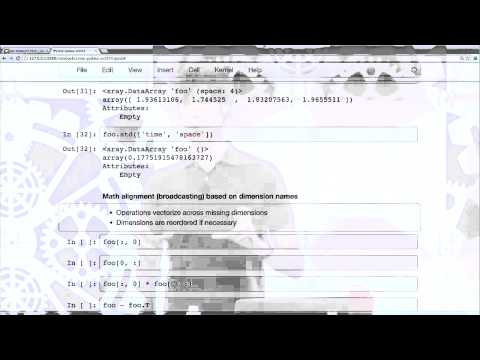

In [3]:
YouTubeVideo('T5CZyNwBa9c', width=500, height=400, start=0)

## Some examples

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap as bm

In [6]:
import xarray as xr; print(xr.__version__)

0.10.0


### Open a netcdf file: monthly HGT from NCEP / NCAR from January 1948 to July 2017

The file (270 Mb) can be downloaded at [ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.mean.nc](ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.mean.nc)

In [7]:
dpath = 'S:/fauchereaun/Python_Workshop/data/'

In [8]:
dpath = '/Users/nicolasf/drives/auck_scratch/fauchereaun/Pythocn_Workshop/data/'

In [11]:
dset = xr.open_dataset('/Users/nicolasf/drives/auck_scratch/fauchereaun/Python_Workshop/data/hgt.mon.mean.nc')

In [12]:
dset.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 835)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    hgt      (time, level, lat, lon) float64 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1>

**dset** is a [xray.Dataset](http://xray.readthedocs.org/en/stable/data-structures.html#dataset), It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

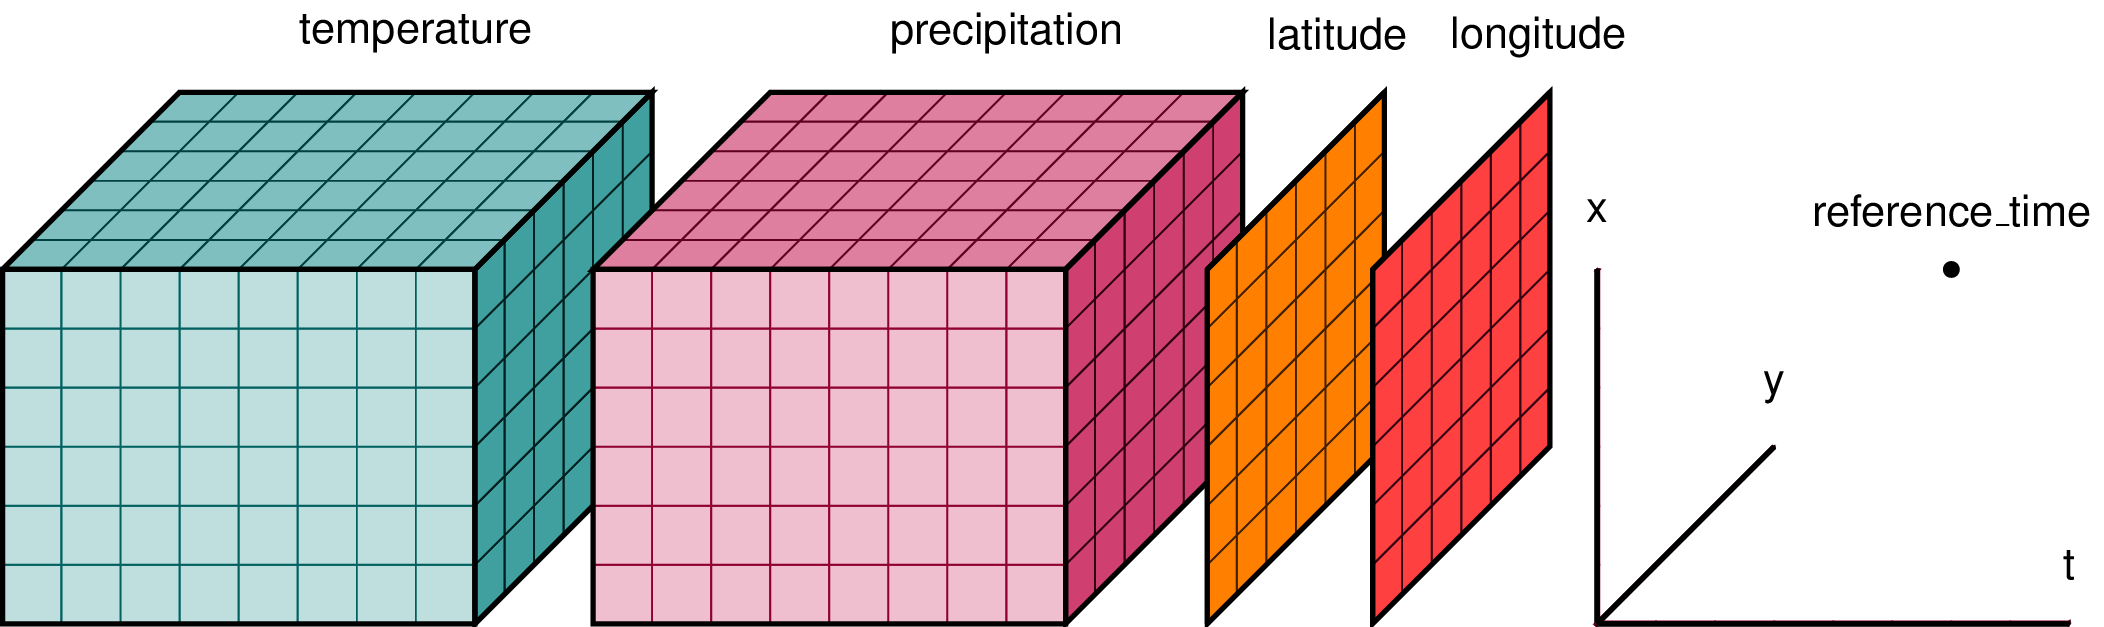

In [13]:
Image('http://xarray.pydata.org/en/stable/_images/dataset-diagram.png', width=700)

In [14]:
dset.dims

Frozen(SortedKeysDict({'level': 17, 'lon': 144, 'lat': 73, 'time': 835}))

### accessing variables

In [15]:
lat = dset['lat']

In [16]:
lat

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [17]:
type(lat)

xarray.core.dataarray.DataArray

In [18]:
lat.attrs

OrderedDict([('units', 'degrees_north'),
             ('actual_range', array([ 90., -90.], dtype=float32)),
             ('long_name', 'Latitude'),
             ('standard_name', 'latitude'),
             ('axis', 'Y')])

In [19]:
type(lat.data)

numpy.ndarray

In [20]:
lat.data

array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,
        67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,
        45. ,  42.5,  40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,
        22.5,  20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5,
         0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. , -42.5,
       -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. ,
       -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5, -90. ], dtype=float32)

### selecting a Dataset along dimensions

In [21]:
dset

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 835)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    hgt      (time, level, lat, lon) float64 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [22]:
dset.sel(time='1998-1-01')

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
    time     datetime64[ns] 1998-01-01
Data variables:
    hgt      (level, lat, lon) float64 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [23]:
dset.sel(time=slice('1998-01-01','2000-12-01'))

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 36)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Data variables:
    hgt      (time, level, lat, lon) float64 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

when selecting along any dimension, you need to respect the ORDER of the dimensions, i.e. in this case,
the latitudes go from NORTH TO SOUTH 

In [24]:
dset.sel(time=slice('1998-01-01','2000-12-01'), lat=slice(40,-40))

<xarray.Dataset>
Dimensions:  (lat: 33, level: 17, lon: 144, time: 36)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Data variables:
    hgt      (time, level, lat, lon) float64 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [25]:
# dset.sel(time=slice('1998-01-01','2000-12-01'), lat=slice(-40,40))

In [26]:
subset = dset.sel(time='1998-01-01', level=1000, lat=slice(40,-50), lon=slice(100, 220))

In [27]:
subset

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 49)
Coordinates:
    level    float32 1000.0
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
  * lon      (lon) float32 100.0 102.5 105.0 107.5 110.0 112.5 115.0 117.5 ...
    time     datetime64[ns] 1998-01-01
Data variables:
    hgt      (lat, lon) float64 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Created by NOAA-CIRES Climate Diagnostics Center (SAC) fr...
    title:          monthly mean hgt from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

extraction of lat and lon dimensions and cast into 2D arrays (for plotting)

In [28]:
lat = subset['lat']
lon = subset['lon']

In [29]:
lat

<xarray.DataArray 'lat' (lat: 37)>
array([ 40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. ], dtype=float32)
Coordinates:
    level    float32 1000.0
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
    time     datetime64[ns] 1998-01-01
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [30]:
lons, lats = np.meshgrid(lon, lat)

Text(0.5,1,'lats')

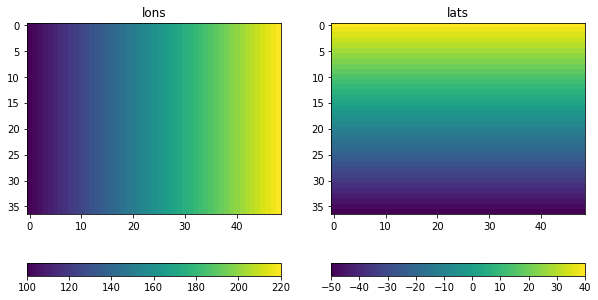

In [31]:
f, axes = plt.subplots(ncols=2, figsize=(10,6))
im = axes[0].imshow(lons)
plt.colorbar(im, ax=axes[0], orientation='horizontal')
axes[0].set_title('lons')
im = axes[1].imshow(lats)
plt.colorbar(im, ax=axes[1], orientation='horizontal')
axes[1].set_title('lats')

#### defines the Basemap projection

In [32]:
m = bm(projection='cyl',llcrnrlat=lat.min(),urcrnrlat=lat.max(),\
            llcrnrlon=lon.min(),urcrnrlon=lon.max(),\
            lat_ts=0,resolution='i')

#### defines a function to plot a field (must be 2D)

In [33]:
def plot_field(X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
#     im = m.contourf(lons, lats, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    im = m.pcolormesh(lons, lats, X, vmin = vmin, vmax = vmax, latlon=True, cmap=cmap, ax=ax)

    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1])
        m.drawparallels([-40, 0, 40], labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)

#### plots 

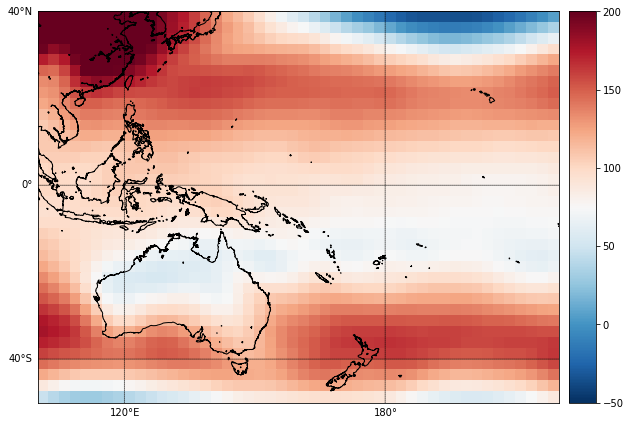

In [34]:
plot_field(subset['hgt'], lats, lons, -50, 200, 10, cmap=plt.get_cmap('RdBu_r'), grid=True)

#### close the files 

In [35]:
dset.close()

In [36]:
subset.close()

### reading multiple files datasets 

reading datasets that are split in different files (i.e. one file per year or month) is relatively easy in xarray, you just need to pass a LIST (Python list) of file paths

In [37]:
import os

In [38]:
from glob import glob

In [39]:
dpath = '/Users/nicolasf/drives/auck_scratch/fauchereaun/Python_Workshop/data/ERSST/'

In [40]:
lfiles = glob(os.path.join(dpath, "ersst*ft.nc"))

In [41]:
len(lfiles)

463

In [42]:
lfiles[0]

'/Users/nicolasf/drives/auck_scratch/fauchereaun/Python_Workshop/data/ERSST/ersst.197901_ft.nc'

In [43]:
lfiles[1]

'/Users/nicolasf/drives/auck_scratch/fauchereaun/Python_Workshop/data/ERSST/ersst.197902_ft.nc'

In [44]:
dset = xr.open_mfdataset(lfiles)

In [45]:
dset

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 463)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sst      (time, lat, lon) float64 dask.array<shape=(463, 89, 180), chunksize=(1, 89, 180)>

In [46]:
subset = dset.sel(lon=slice(100., 200.), lat=slice(-50., 10.))

In [47]:
subset

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, time: 463)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sst      (time, lat, lon) float64 dask.array<shape=(463, 31, 51), chunksize=(1, 31, 51)>

### aggregation functions along dimensions

you can apply functions along the dimensions of a **xarray** dataset, i.e. calculate a mean over time, or (for zonal means), over latitudes

In [48]:
subset

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, time: 463)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sst      (time, lat, lon) float64 dask.array<shape=(463, 31, 51), chunksize=(1, 31, 51)>

In [49]:
lat = subset['lat']
lon = subset['lon']
lons, lats = np.meshgrid(lon, lat)

In [50]:
time_mean = subset.mean('time')

In [51]:
time_mean

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
Data variables:
    sst      (lat, lon) float64 dask.array<shape=(31, 51), chunksize=(31, 51)>

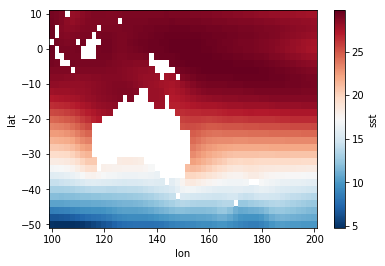

In [52]:
time_mean['sst'].plot(cmap=plt.get_cmap('RdBu_r'))

In [53]:
zonal_mean = subset.mean('lat')

In [54]:
zonal_mean

<xarray.Dataset>
Dimensions:  (lon: 51, time: 463)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sst      (time, lon) float64 dask.array<shape=(463, 51), chunksize=(1, 51)>

Text(0.5,1,'ZONAL MEAN SSTs')

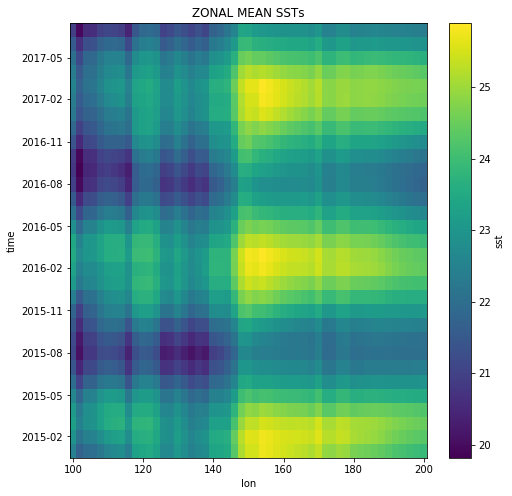

In [55]:
f, my_axes = plt.subplots(figsize=(8,8))
zonal_mean.sel(time=slice('2015', None))['sst'].plot(ax=my_axes)
my_axes.set_title('ZONAL MEAN SSTs')

And that can be handy to calculate an index ... 

In [56]:
index = subset.mean('lon').mean('lat')

In [57]:
index

<xarray.Dataset>
Dimensions:  (time: 463)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sst      (time) float64 dask.array<shape=(463,), chunksize=(1,)>

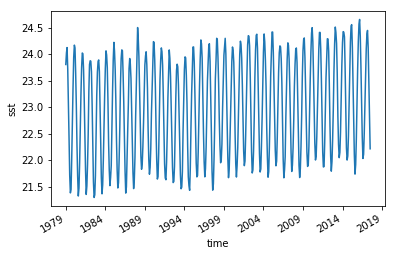

In [58]:
index['sst'].plot()

### calculates a monthly climatology using the groupby machinery

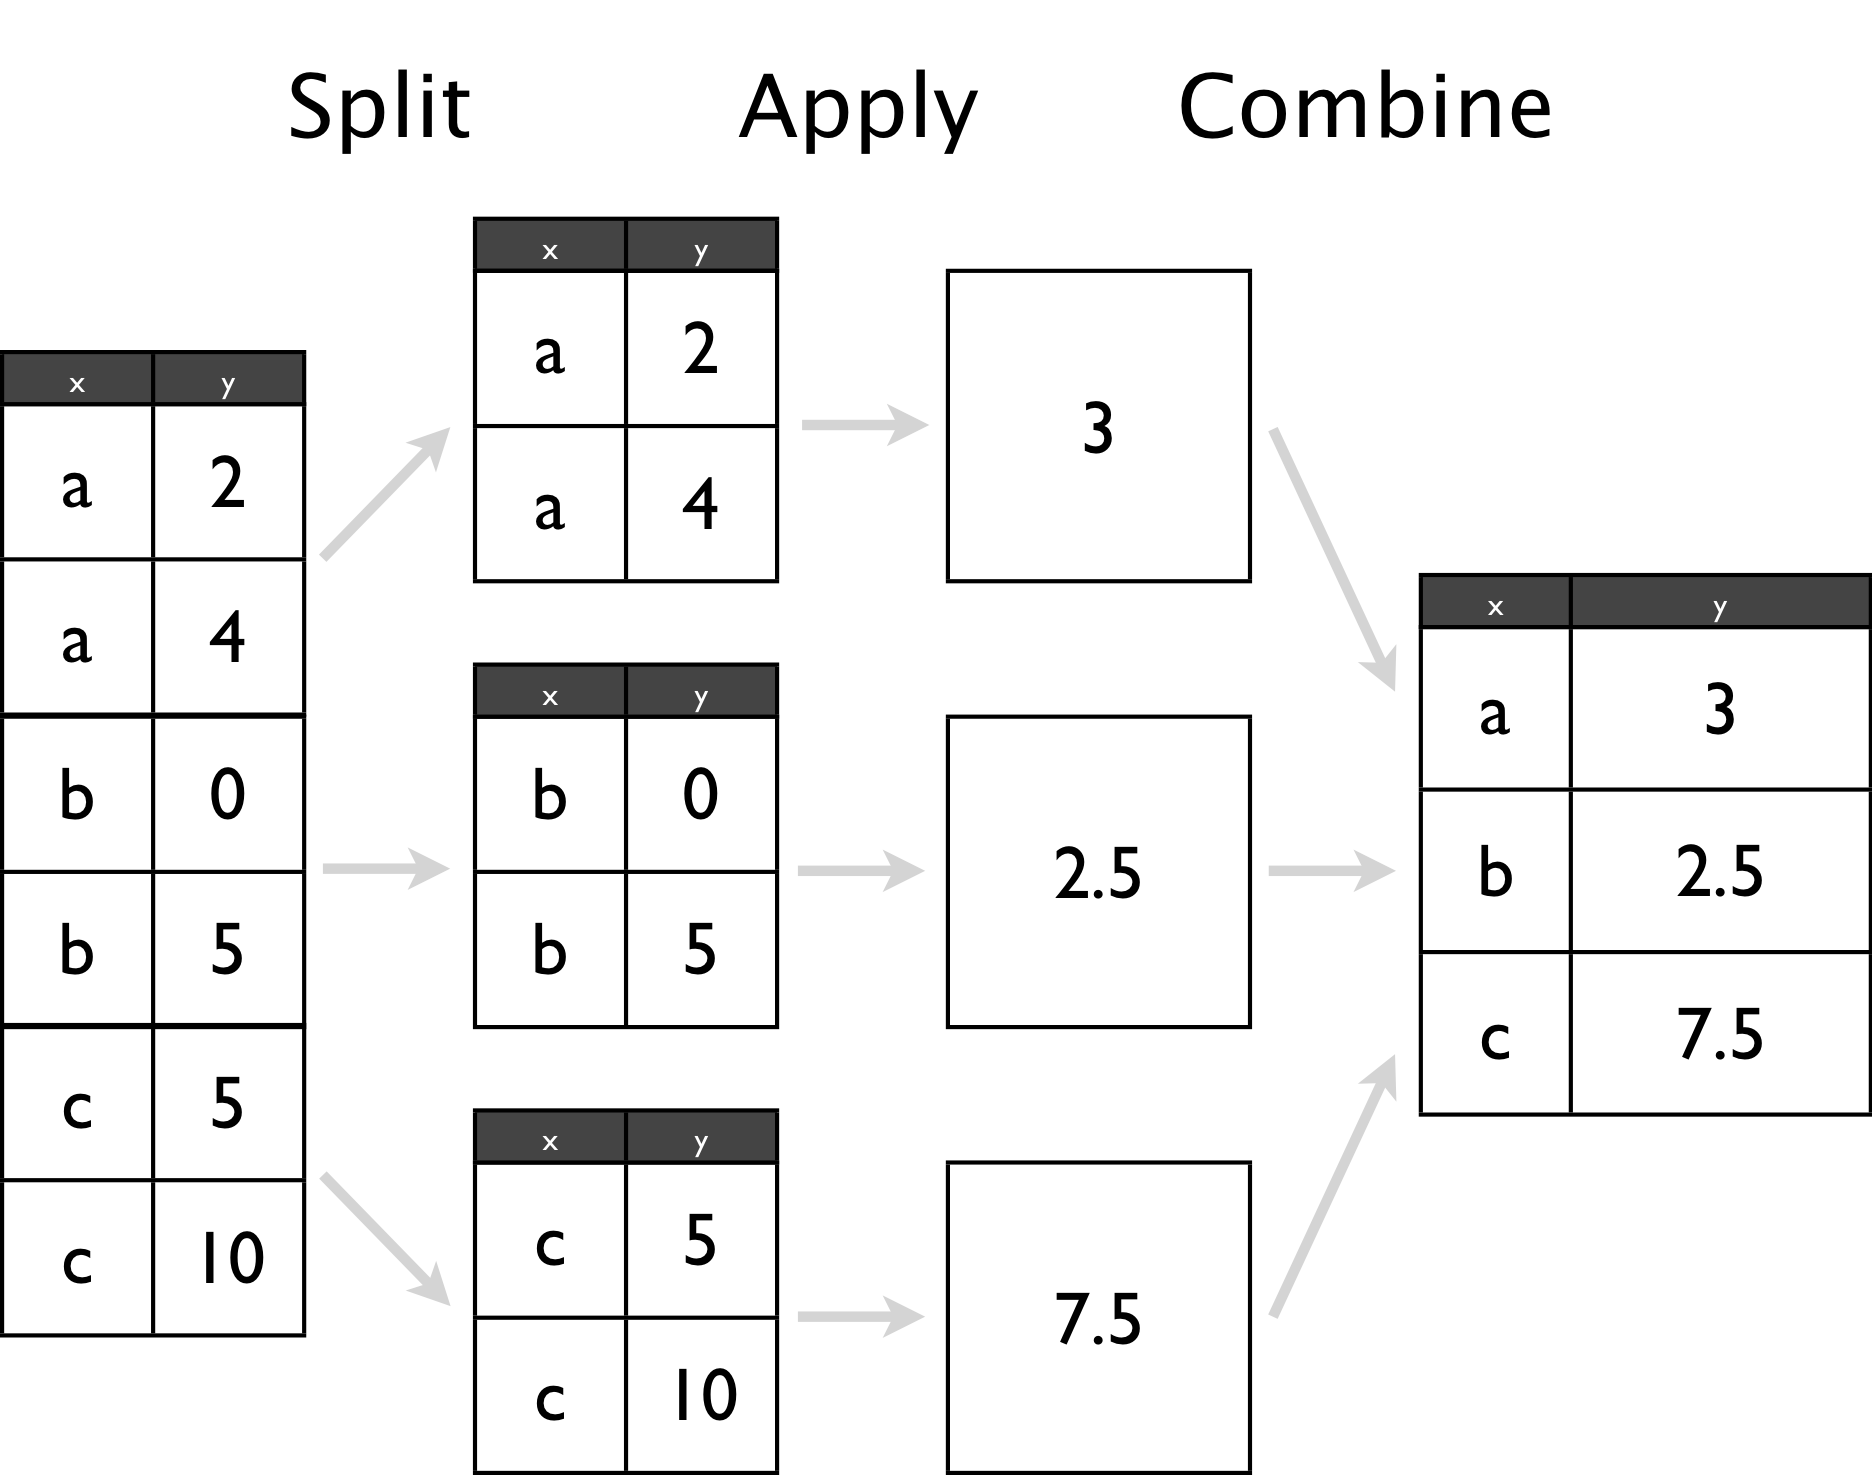

In [59]:
Image(filename='images/split-apply-combine.png', width=800)

In [60]:
lat = subset['lat']
lon = subset['lon']

In [61]:
lons, lats = np.meshgrid(lon, lat)

### CLIMATOLOGY

In [62]:
subset

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, time: 463)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sst      (time, lat, lon) float64 dask.array<shape=(463, 31, 51), chunksize=(1, 31, 51)>

In [63]:
clim = subset.groupby('time.month').mean('time')

In [64]:
clim

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, month: 12)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float64 dask.array<shape=(12, 31, 51), chunksize=(1, 31, 51)>

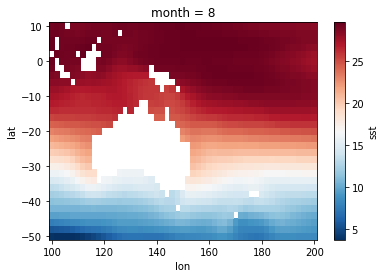

In [65]:
clim.sel(month = 8)['sst'].plot(cmap=plt.get_cmap('RdBu_r'))

In [66]:
clim

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, month: 12)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float64 dask.array<shape=(12, 31, 51), chunksize=(1, 31, 51)>

In [67]:
from calendar import month_abbr

In [68]:
months = month_abbr[1:]

In [69]:
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [70]:
clim['month'] = (('month'), months)

In [71]:
clim

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, month: 12)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * month    (month) <U3 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' ...
Data variables:
    sst      (month, lat, lon) float64 dask.array<shape=(12, 31, 51), chunksize=(1, 31, 51)>

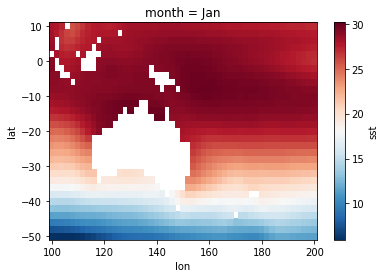

In [72]:
clim.sel(month = 'Jan')['sst'].plot(cmap=plt.get_cmap('RdBu_r'))

### the plot method accepts parameters allowing to fo facetted plots 

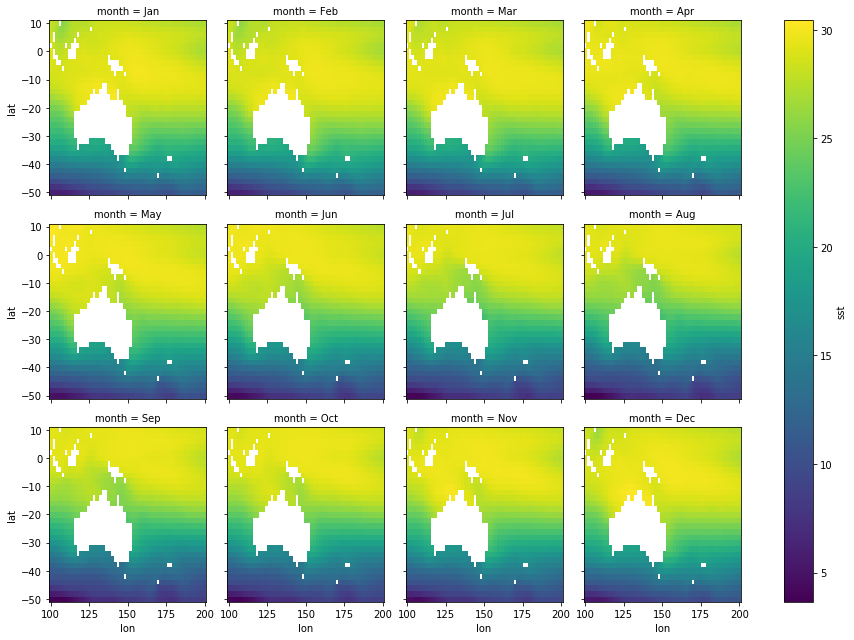

In [76]:
clim['sst'].plot(x='lon', y='lat', col='month', col_wrap=4)

### to plot in on a proper map, use basemap

In [77]:
from calendar import month_name

In [78]:
m = bm(projection='cyl',llcrnrlat=lat.min(),urcrnrlat=lat.max(),\
            llcrnrlon=lon.min(),urcrnrlon=lon.max(),\
            lat_ts=0,resolution='c')

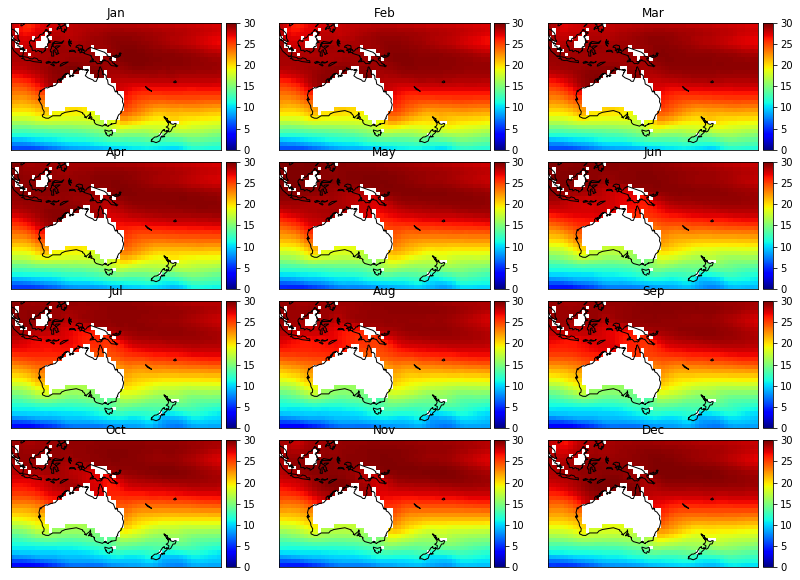

In [79]:
f, axes = plt.subplots(nrows=4,ncols=3, figsize=(14,10))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten()
for i, month in enumerate(months): 
    ax = axes[i]
    plot_field(clim.sel(month=month)['sst'], lats, lons, 0, 30, 1, ax=ax, title=month)

**NOTE**: If you have **DAILY** data, you can calculate a daily climatology using the `dayofyear` attribute, e.g.: 
    
```python 

clim = dset.groupby('time.dayofyear').mean('time')

```

### calculates a seasonal (DJF, MAM, ...) climatology

In [80]:
seas_clim = subset.groupby('time.season').mean('time')

In [81]:
seas_clim

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, season: 4)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float64 dask.array<shape=(4, 31, 51), chunksize=(1, 31, 51)>

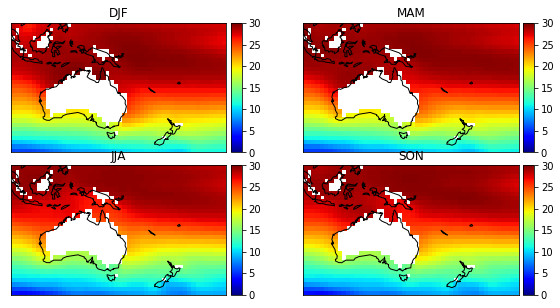

In [82]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,:,:].values, lats, lons, 0, 30, 1, ax=ax, title=seas)

### calculates seasonal averages weigthed by the number of days in each month

adapted from [http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example](http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example)

In [83]:
def get_dpm(time):
    """
    return a array of days per month corresponding to the months provided in `time`
    """
    import calendar as cal
    month_length = np.zeros(len(time), dtype=np.float)

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal.monthrange(year, month)[1]
    return month_length

In [84]:
def season_mean(ds, calendar='standard'):
    # Make a DataArray of season/year groups
    year_season = xr.DataArray(ds.time.to_index().to_period(freq='Q-NOV').to_timestamp(how='E'),
                                 coords=[ds.time], name='year_season')

    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = xr.DataArray(get_dpm(ds.time.to_index()),
                                  coords=[ds.time], name='month_length')
    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby('time.season') / month_length.groupby('time.season').sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby('time.season').sum(dim='time')

In [85]:
sst_seas = season_mean(subset)

In [86]:
sst_seas

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 51, season: 4)
Coordinates:
  * lon      (lon) float32 100.0 102.0 104.0 106.0 108.0 110.0 112.0 114.0 ...
  * lat      (lat) float32 -50.0 -48.0 -46.0 -44.0 -42.0 -40.0 -38.0 -36.0 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float64 dask.array<shape=(4, 31, 51), chunksize=(1, 31, 51)>

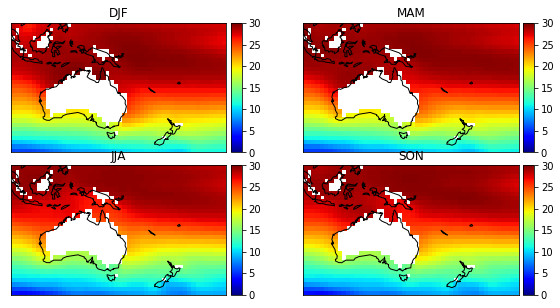

In [87]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].data): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,:,:].data, lats, lons, 0, 30, 1, ax=ax, title=seas)

#### difference between non-weigthed and weighted seasonal climatologies

In [88]:
diff_seas = seas_clim - sst_seas

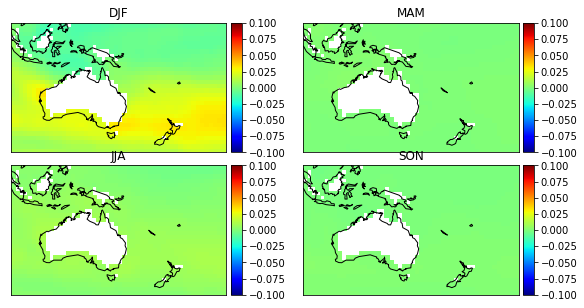

In [89]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(diff_seas['sst'][i,:,:].data, lats, lons, -0.1, 0.1, 0.01, ax=ax, title=seas)

### calculates anomalies with respect to a specific climatological *normal*

#### 1. defines the function

In [90]:
def demean(x): 
    return x - x.sel(time=slice('1981-01-01','2010-12-01')).mean('time')

#### 2. apply the function to the groupby object

In [91]:
sst_anoms = subset['sst'].groupby('time.month').apply(demean) 

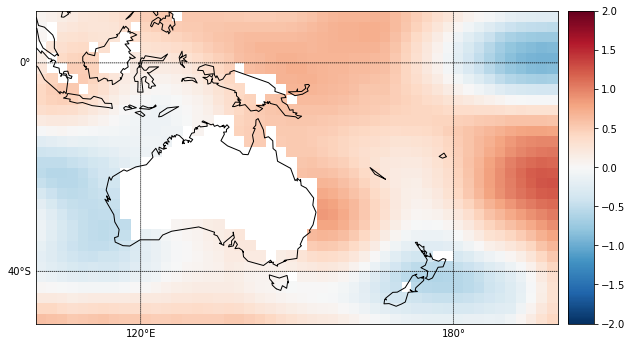

In [92]:
plot_field(sst_anoms.sel(time=('2017-01-01')), lats, lons, -2, 2, 0.1, \
           cmap=plt.get_cmap('RdBu_r'), grid=True)

### Creates a xray dataset object from numpy arrays

In [93]:
lon = np.linspace(0, 357.5, 144, endpoint=True)
lat = np.linspace(-90,90, 73, endpoint=True)

lons, lats = np.meshgrid(lon,lat)

lev = np.array([1000,925,850])
time = pd.date_range(start='2015-1-1',end='2015-1-3')

In [94]:
lat

array([-90. , -87.5, -85. , -82.5, -80. , -77.5, -75. , -72.5, -70. ,
       -67.5, -65. , -62.5, -60. , -57.5, -55. , -52.5, -50. , -47.5,
       -45. , -42.5, -40. , -37.5, -35. , -32.5, -30. , -27.5, -25. ,
       -22.5, -20. , -17.5, -15. , -12.5, -10. ,  -7.5,  -5. ,  -2.5,
         0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ])

In [95]:
arr = np.random.randn(3,3,73,144)

The dictionnary **keys** are the **variables** contained in the Dataset.<br><br>
The Dictionnary **values** are **tuples**, with first the (or the list of) dimension(s) over which the array varies, then the array itself

In [96]:
d = {}
d['time'] = ('time',time)
d['latitudes'] = ('latitudes',lat)
d['longitudes'] = ('longitudes', lon)
d['level'] = ('level', lev)
d['var'] = (['time','level','latitudes','longitudes'], arr)

In [97]:
dset = xr.Dataset(d)

In [98]:
dset

<xarray.Dataset>
Dimensions:     (latitudes: 73, level: 3, longitudes: 144, time: 3)
Coordinates:
  * level       (level) int64 1000 925 850
  * latitudes   (latitudes) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 ...
  * longitudes  (longitudes) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
  * time        (time) datetime64[ns] 2015-01-01 2015-01-02 2015-01-03
Data variables:
    var         (time, level, latitudes, longitudes) float64 1.167 -1.413 ...

adding global attributes

In [99]:
dset.attrs['author'] = 'nicolas.fauchereau@gmail.com'

In [100]:
dset

<xarray.Dataset>
Dimensions:     (latitudes: 73, level: 3, longitudes: 144, time: 3)
Coordinates:
  * level       (level) int64 1000 925 850
  * latitudes   (latitudes) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 ...
  * longitudes  (longitudes) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
  * time        (time) datetime64[ns] 2015-01-01 2015-01-02 2015-01-03
Data variables:
    var         (time, level, latitudes, longitudes) float64 1.167 -1.413 ...
Attributes:
    author:   nicolas.fauchereau@gmail.com

adding variables attributes

In [101]:
dset.longitudes.attrs['units'] = 'degrees_east'
dset.latitudes.attrs['units'] = 'degrees_north'

In [102]:
dset.latitudes.attrs

OrderedDict([('units', 'degrees_north')])

In [103]:
dset.sel(time='2015-1-2', level=1000)

<xarray.Dataset>
Dimensions:     (latitudes: 73, longitudes: 144)
Coordinates:
    level       int64 1000
  * latitudes   (latitudes) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 ...
  * longitudes  (longitudes) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
    time        datetime64[ns] 2015-01-02
Data variables:
    var         (latitudes, longitudes) float64 -0.1094 0.5722 -0.6281 ...
Attributes:
    author:   nicolas.fauchereau@gmail.com

In [104]:
lons, lats = np.meshgrid(dset['longitudes'], dset['latitudes'])

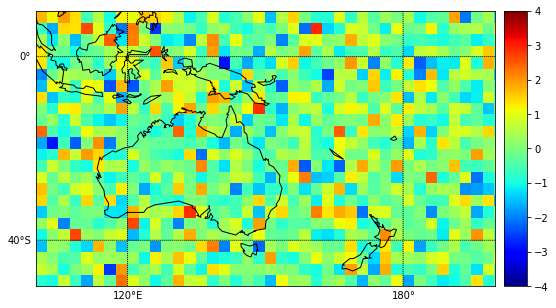

In [105]:
plot_field(dset.sel(time='2015-1-2', level=1000)['var'], \
           lats, lons, -4, 4, 0.1, grid=True)

In [106]:
dset.to_netcdf('./data/dset_from_dict.nc')

In [107]:
!/usr/local/bin/ncdump -h ./data/dset_from_dict.nc

netcdf dset_from_dict {
dimensions:
	level = 3 ;
	latitudes = 73 ;
	time = 3 ;
	longitudes = 144 ;
variables:
	int64 level(level) ;
	double latitudes(latitudes) ;
		latitudes:_FillValue = NaN ;
		latitudes:units = "degrees_north" ;
	double var(time, level, latitudes, longitudes) ;
		var:_FillValue = NaN ;
	double longitudes(longitudes) ;
		longitudes:_FillValue = NaN ;
		longitudes:units = "degrees_east" ;
	int64 time(time) ;
		time:units = "days since 2015-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;

// global attributes:
		:_NCProperties = "version=1|netcdflibversion=4.4.1.1|hdf5libversion=1.10.1" ;
		:author = "nicolas.fauchereau@gmail.com" ;
}


### Creates a xray dataset object from a Pandas DataFrame

In [108]:
import string
df = pd.DataFrame(np.random.randn(365,5), \
                  index=pd.date_range(start='2014-1-1', periods=365), \
                  columns=list(string.ascii_letters[:5]))

In [109]:
df.head()

,a,b,c,d,e
2014-01-01,0.128195,0.727691,-0.712107,0.258580,-0.562393
2014-01-02,0.081261,-0.820584,0.671351,-0.187548,0.136149
2014-01-03,-0.412344,0.132993,2.231399,-0.803051,0.088476
2014-01-04,0.787324,-0.168534,-0.310979,-0.334335,0.311653
2014-01-05,0.306530,0.305718,0.030035,0.158839,1.504315


#### from DataFrame

In [110]:
df_ds = xr.Dataset.from_dataframe(df)

In [111]:
df_ds

<xarray.Dataset>
Dimensions:  (index: 365)
Coordinates:
  * index    (index) datetime64[ns] 2014-01-01 2014-01-02 2014-01-03 ...
Data variables:
    a        (index) float64 0.1282 0.08126 -0.4123 0.7873 0.3065 -0.4216 ...
    b        (index) float64 0.7277 -0.8206 0.133 -0.1685 0.3057 0.8043 ...
    c        (index) float64 -0.7121 0.6714 2.231 -0.311 0.03004 -1.056 ...
    d        (index) float64 0.2586 -0.1875 -0.8031 -0.3343 0.1588 -1.128 ...
    e        (index) float64 -0.5624 0.1361 0.08848 0.3117 1.504 -2.098 ...

In [112]:
group = df_ds.groupby('index.month').mean('index')

In [113]:
group

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    a        (month) float64 -0.1539 -0.1075 0.3224 0.1076 0.005452 0.217 ...
    b        (month) float64 -0.01228 -0.04013 -0.01172 0.2506 0.09594 ...
    c        (month) float64 0.1054 0.4578 0.01145 0.05687 0.2693 -0.02755 ...
    d        (month) float64 0.2273 -0.2829 -0.05534 -0.04699 -0.07819 ...
    e        (month) float64 -0.1798 -0.1198 0.4548 0.02081 -0.05321 0.4739 ...

#### converts TO a Pandas.DataFrame

In [114]:
group_df = group.to_dataframe()

In [115]:
group_df.reindex_axis(list(string.ascii_letters[:5]), axis=1).head()

,a,b,c,d,e
month,,,,,
1,-0.153906,-0.012277,0.105359,0.227277,-0.179847
2,-0.107549,-0.040125,0.457802,-0.282880,-0.119845
3,0.322420,-0.011715,0.011454,-0.055344,0.454779
4,0.107604,0.250554,0.056874,-0.046990,0.020810
5,0.005452,0.095937,0.269292,-0.078189,-0.053215


In [116]:
df.groupby(df.index.month).mean().head()

,a,b,c,d,e
1,-0.153906,-0.012277,0.105359,0.227277,-0.179847
2,-0.107549,-0.040125,0.457802,-0.282880,-0.119845
3,0.322420,-0.011715,0.011454,-0.055344,0.454779
4,0.107604,0.250554,0.056874,-0.046990,0.020810
5,0.005452,0.095937,0.269292,-0.078189,-0.053215


### Opening a file throught the network with openDAP

In [117]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/interp_OLR/olr.mon.mean.nc'

In [118]:
olr_dset = xr.open_dataset(url)

In [119]:
olr_sub = olr_dset.sel(time='1998-1-1',lat=slice(30,-30), lon=slice(170, 300))

In [121]:
m = bm(projection='merc',llcrnrlat=-30,urcrnrlat=30,\
            llcrnrlon=170,urcrnrlon=300,\
            lat_ts=0,resolution='c')

In [122]:
lons, lats = np.meshgrid(olr_sub['lon'], olr_sub['lat'])

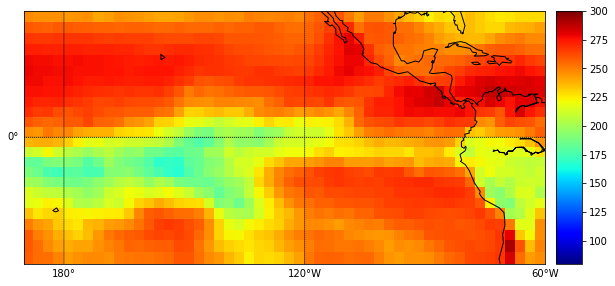

In [123]:
plot_field(olr_sub['olr'].values, lats, lons, 80, 300, 10, grid=True)